# Scratchpad for *An introduction to Statistical Learning*

Book [homepage](http://www-bcf.usc.edu/~gareth/ISL/) and [downloadable pdf](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

In [1]:
#install.packages(c("ISLR", "MASS"))

In [2]:
suppressMessages(library("sm"));
library("vioplot");
library("ISLR");
suppressMessages(library("MASS"));

## Chapter 1

### Wage dataset

In [3]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

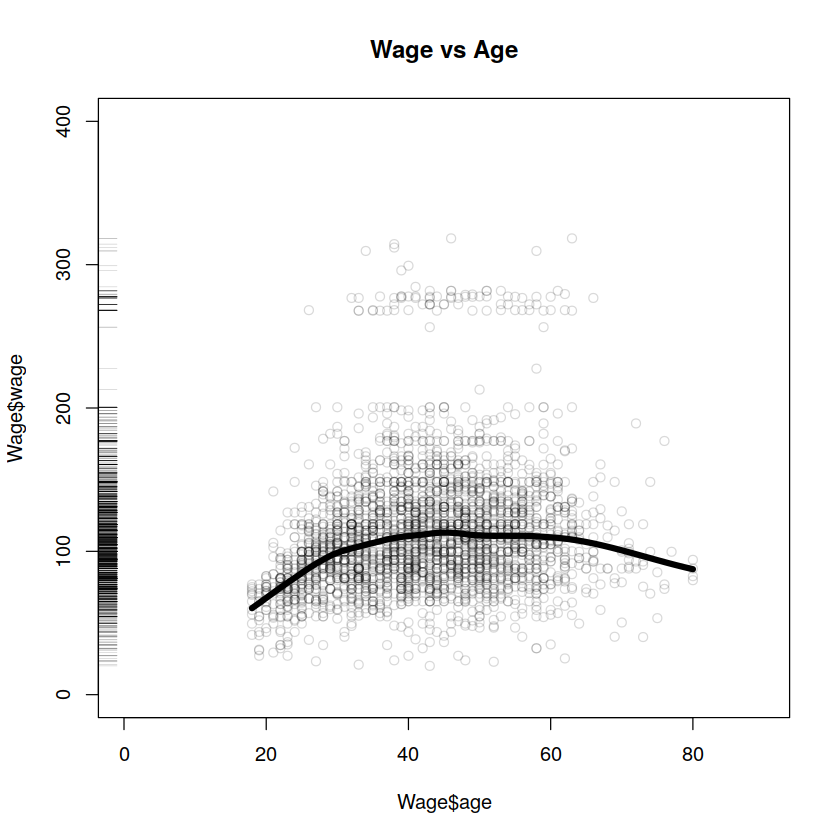

In [4]:
scatter.smooth(Wage$age, Wage$wage, span=0.3, col=rgb(0,0,0,0.15), lpars=list(lwd=5), ylim=c(0,400), xlim=c(0,90)); rug(Wage$wage,side=2, col=rgb(0,0,0,.2));
title("Wage vs Age")

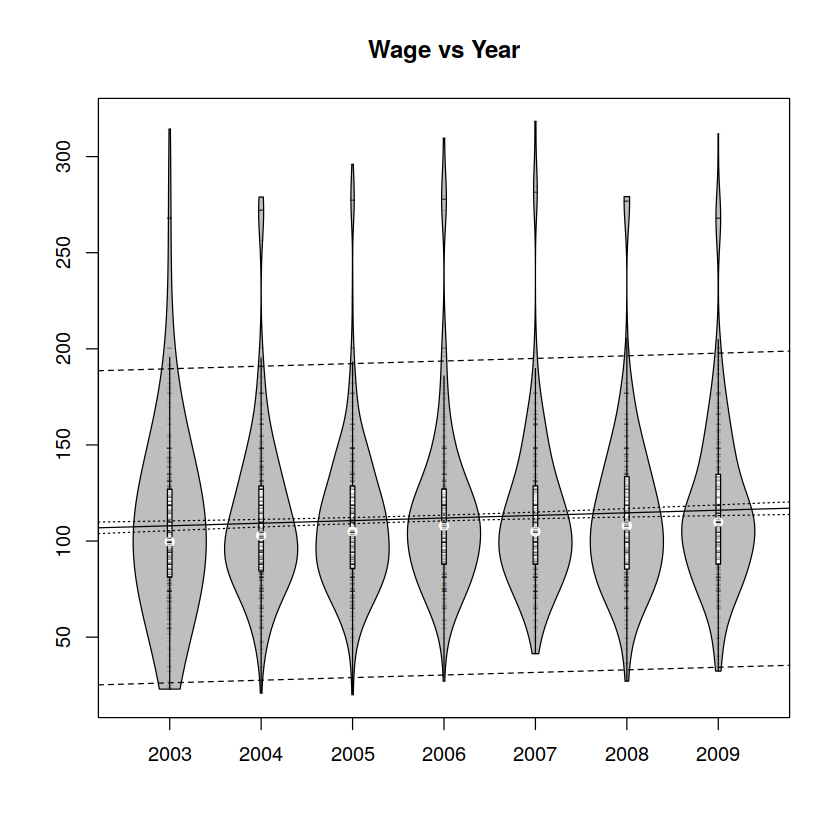

In [5]:
# violin plot
l <- by(Wage$wage, Wage$year, function(x) {x});
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(year), Wage, pch='-', col=rgb(0,0,0,0.1));
title("Wage vs Year")

# linear model with confidence interval
fyear <- as.numeric(as.factor(Wage$year)); # rescale year to match violin plot x-axis
m <- lm(wage ~ fyear, Wage);
xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(fyear=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(fyear=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

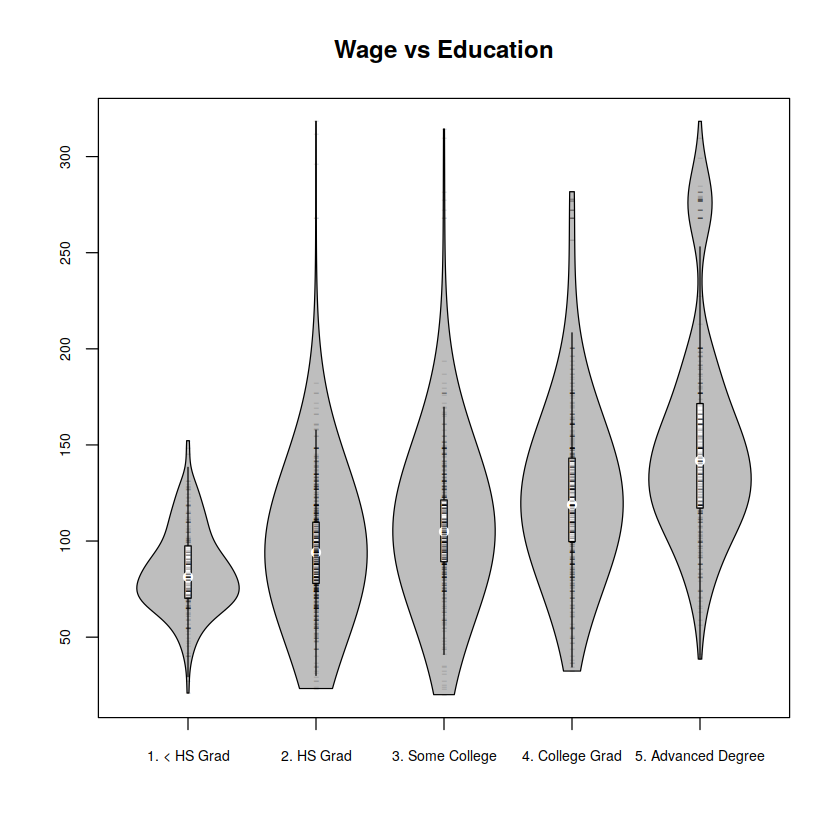

In [6]:

l = by(Wage$wage, Wage$education, function(x) {x});
par(cex.axis=0.70)
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(education), Wage, pch='-', col=rgb(0,0,0,0.1))
title("Wage vs Education")

### Smarket Dataset

In [7]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

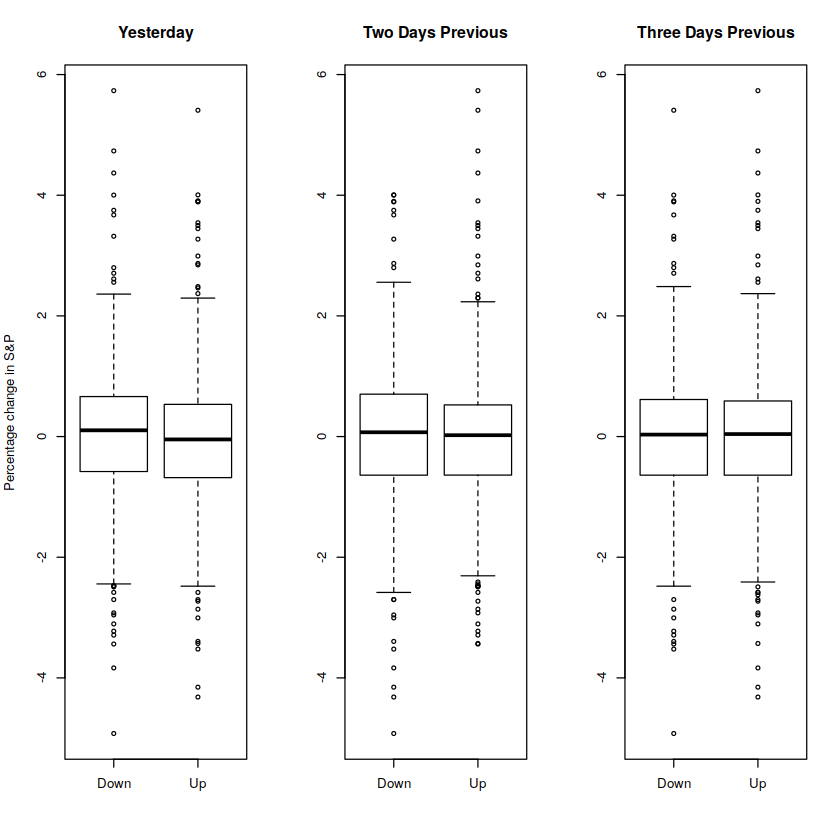

In [8]:
par(mfcol=c(1,3))
boxplot(Lag1 ~ Direction, Smarket, ylab="Percentage change in S&P"); title("Yesterday");
boxplot(Lag2 ~ Direction, Smarket); title("Two Days Previous");
boxplot(Lag3 ~ Direction, Smarket); title("Three Days Previous");

### NCI60 dataset

In [9]:
summary(NCI60)

     Length Class  Mode     
data 437120 -none- numeric  
labs     64 -none- character

In [10]:
pca<-prcomp(t(NCI60$data), scale=T, center=T)

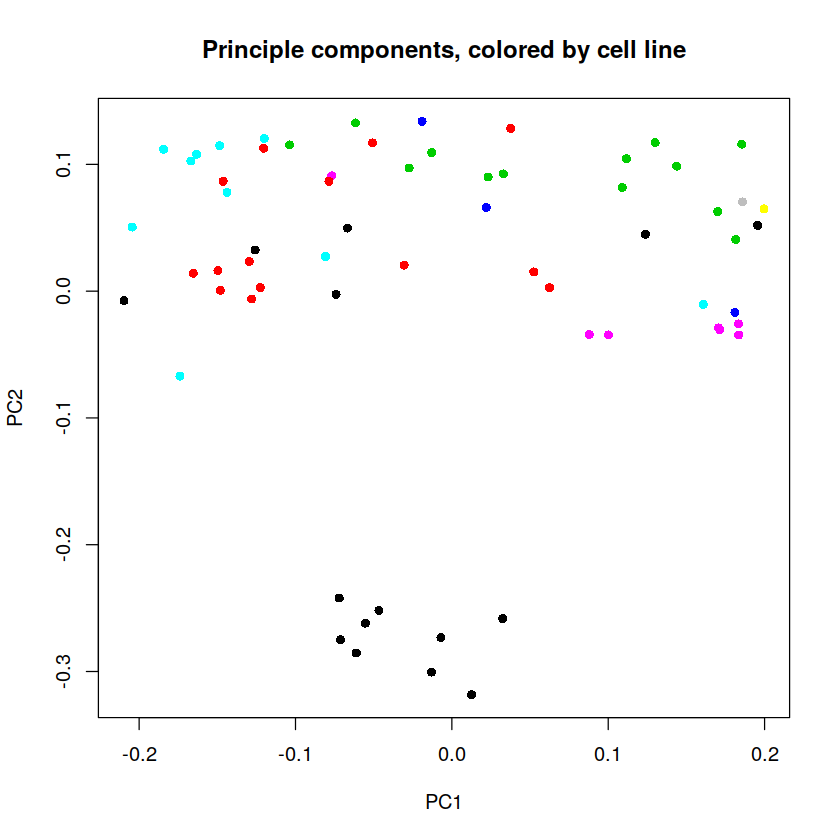

In [11]:
plot(pca$rotation[,1:2], col=as.factor(NCI60$labs), pch=16, main="Principle components, colored by cell line")

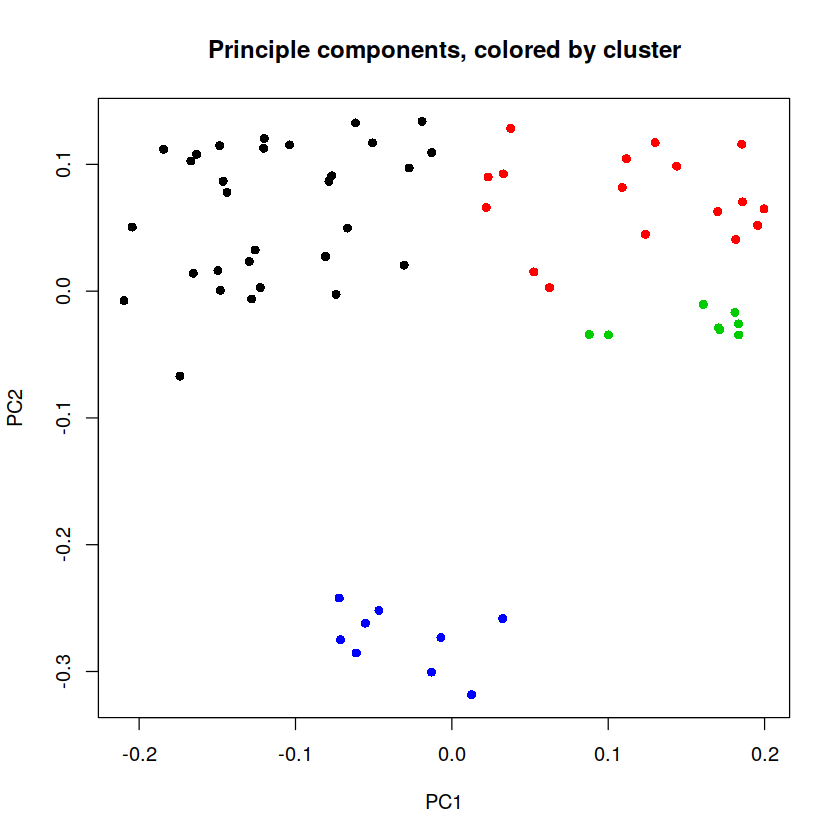

In [12]:
set.seed(20180403) # kmeans clustering uses a random number, so let's ensure reproducability
k <- kmeans(NCI60$data, 4, nstart=4)
plot(pca$rotation[,1:2], col=k$cluster, pch=16, main=("Principle components, colored by cluster"))

## Chapter 2

### lab

In [13]:
matrix(1:15, 3, 5)

In [14]:
matrix(1:15, 3, 5, byrow=T)

1,2,3,4,5
6,7,8,9,10
11,12,13,14,15


In [15]:
seq(-1,1,length=7)

[1] -1.0000000 -0.6666667 -0.3333333  0.0000000  0.3333333  0.6666667  1.0000000

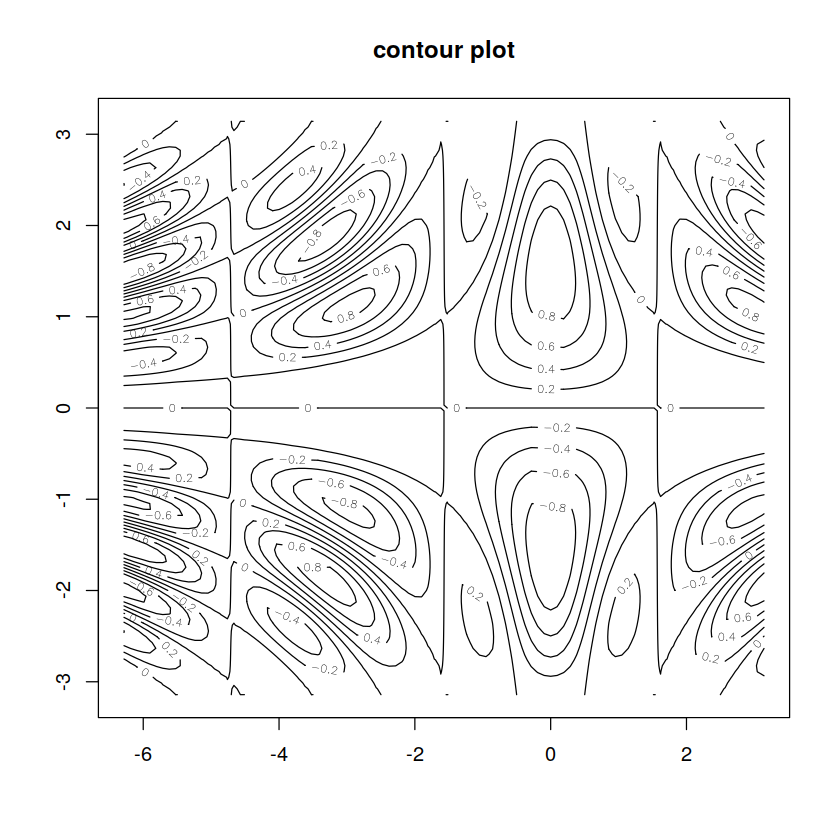

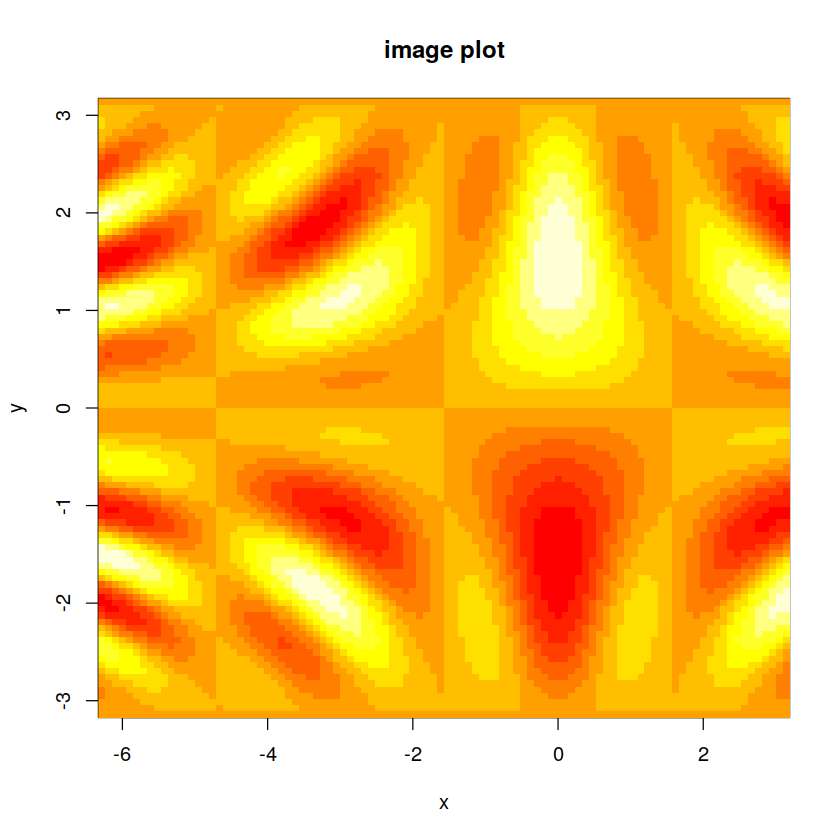

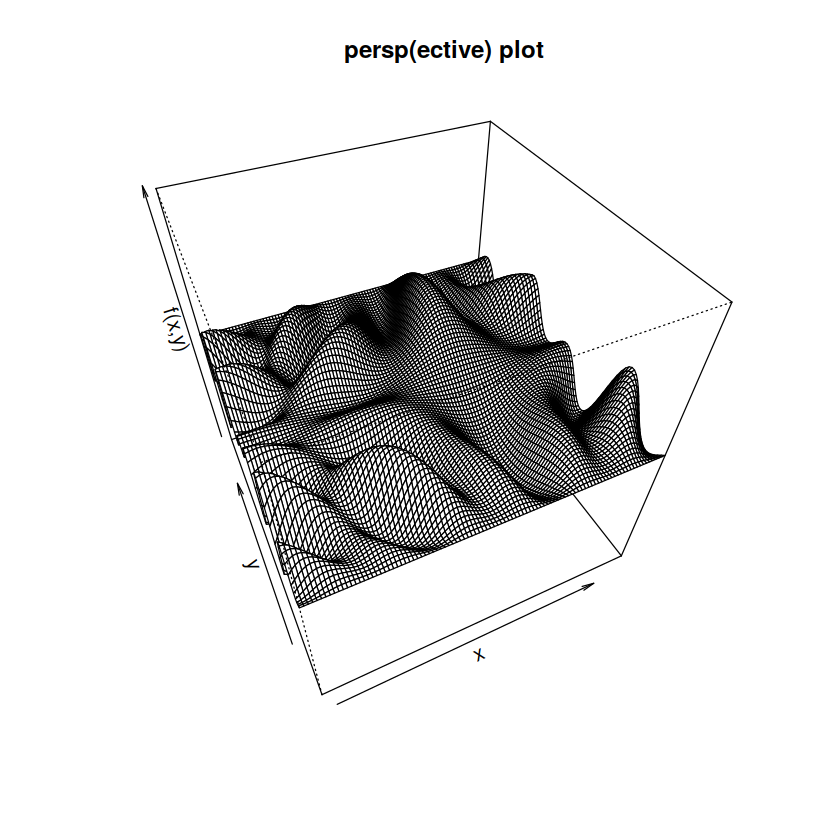

In [16]:
x<-seq(-2*pi, pi, length=100);
y<-seq(-pi, pi, length=100);
contour(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), main="contour plot");
image(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y))); title("image plot");
persp(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), theta=-25, phi=45, zlim=c(-3, 3), zlab="f(x,y)", main="persp(ective) plot");

In [17]:
matrix(1:15, 3, 5)[-2,]

1,4,7,10,13
3,6,9,12,15


In [20]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [23]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

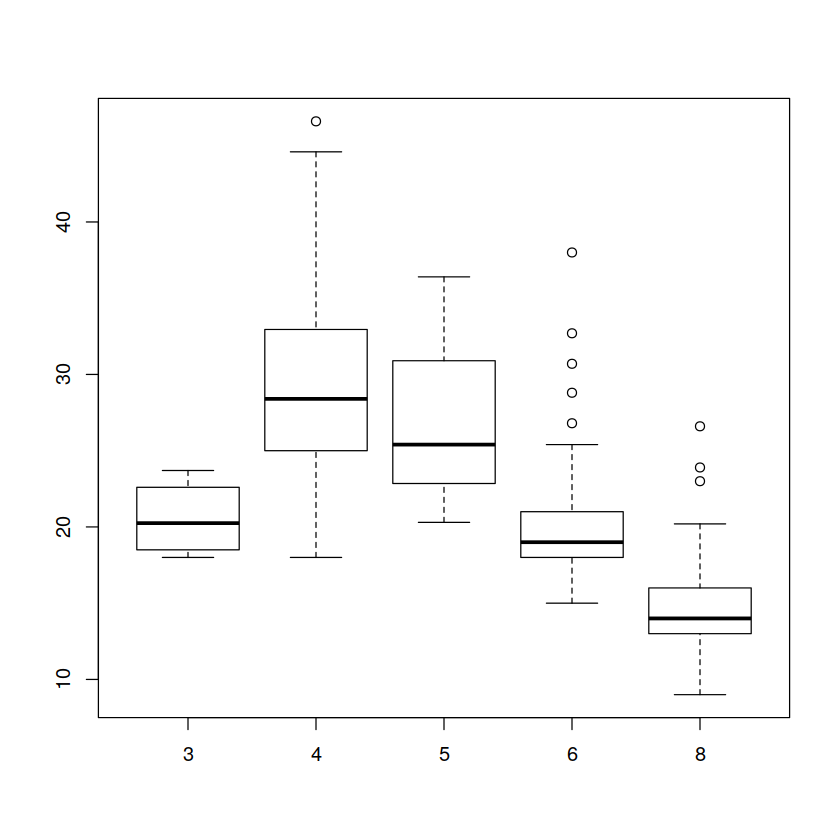

In [26]:
plot(as.factor(Auto$cylinders), Auto$mpg)

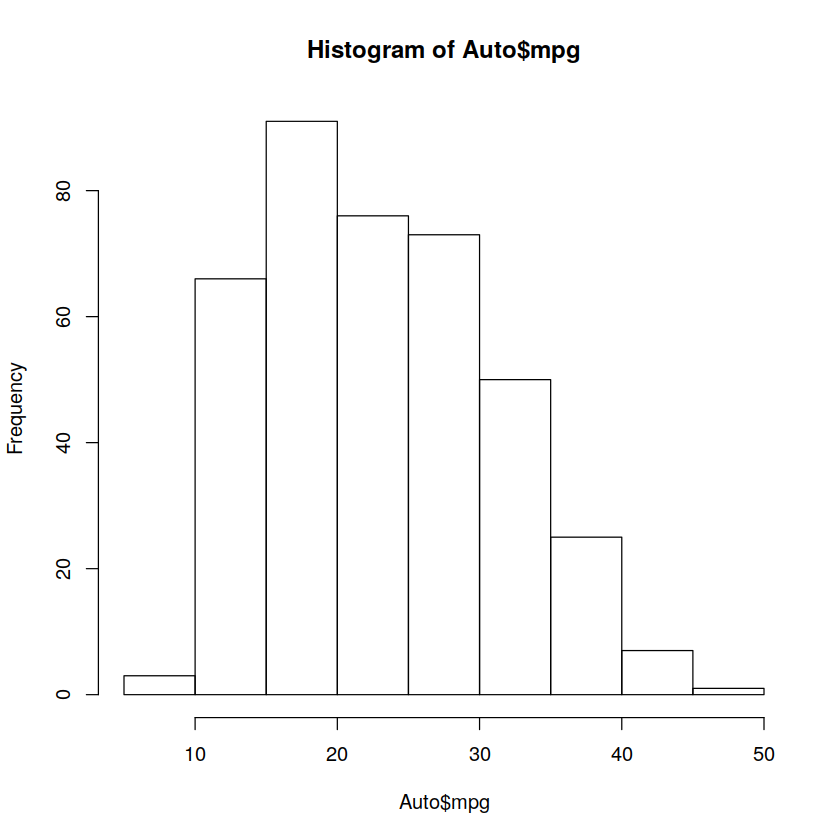

In [27]:
hist(Auto$mpg)

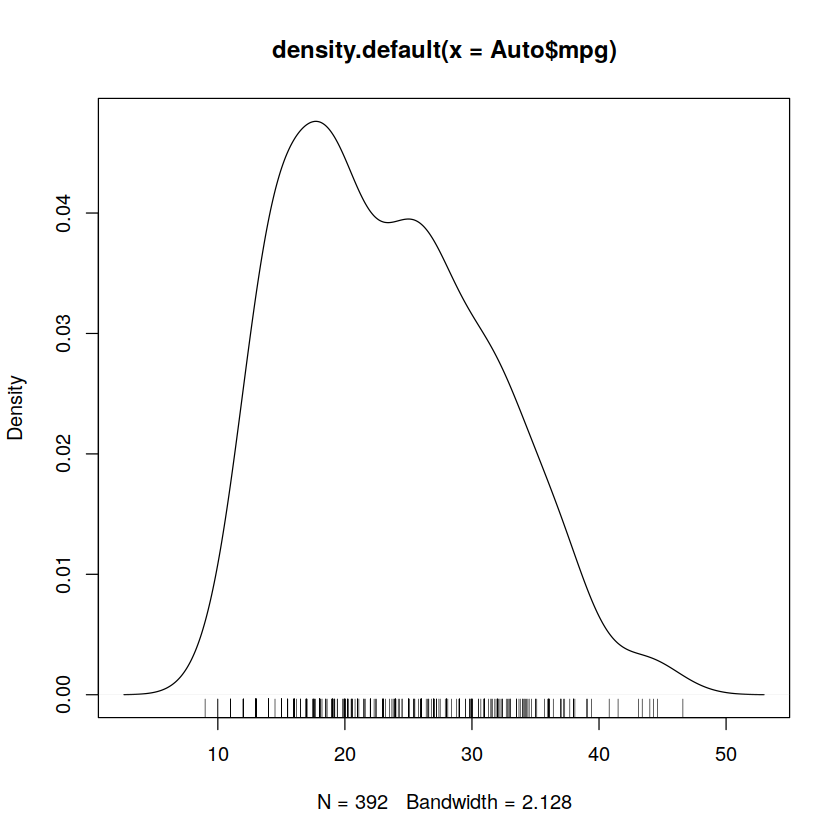

In [28]:
plot(density(Auto$mpg)); rug(Auto$mpg)

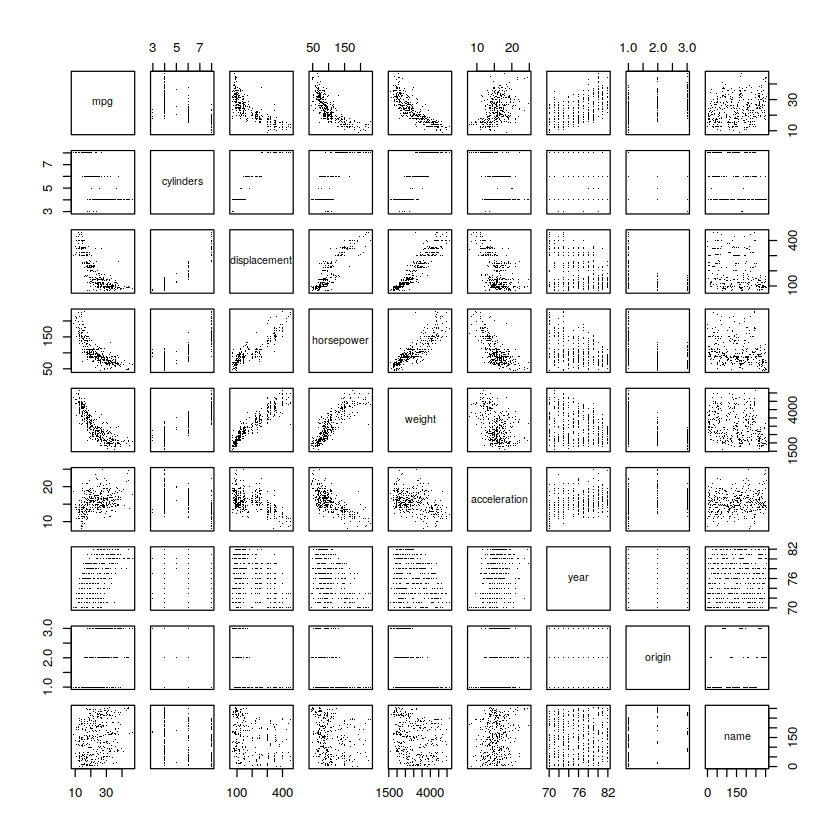

In [31]:
pairs(Auto, pch=".")

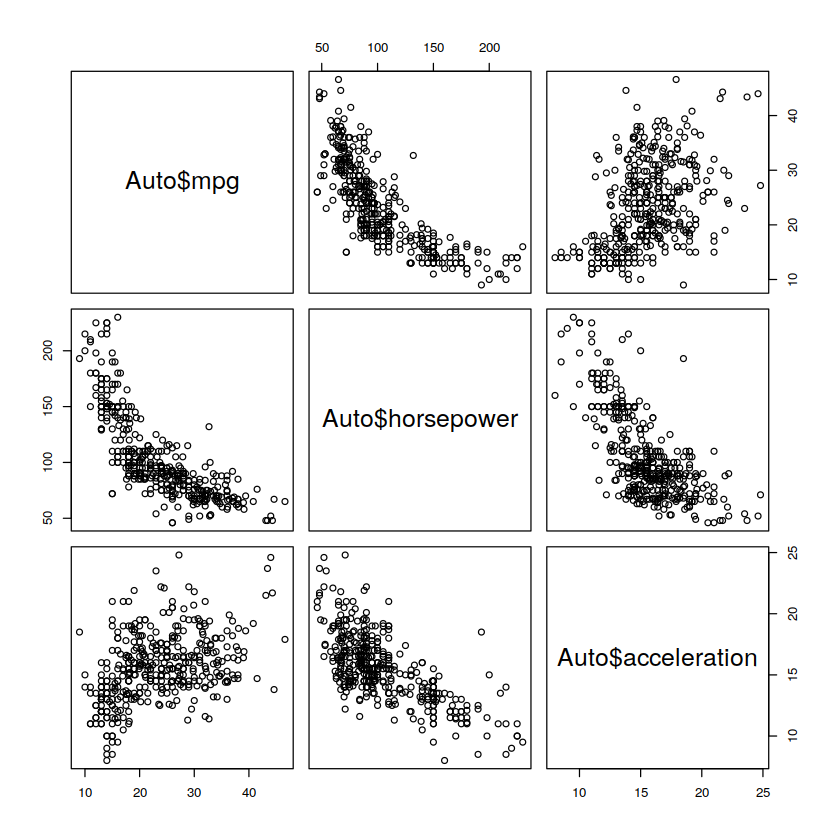

In [34]:
pairs(~ Auto$mpg + Auto$horsepower + Auto$acceleration)


Call:
lm(formula = mpg ~ year, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0212  -5.4411  -0.4412   4.9739  18.2088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.01167    6.64516  -10.54   <2e-16 ***
year          1.23004    0.08736   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.363 on 390 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.3353 
F-statistic: 198.3 on 1 and 390 DF,  p-value: < 2.2e-16


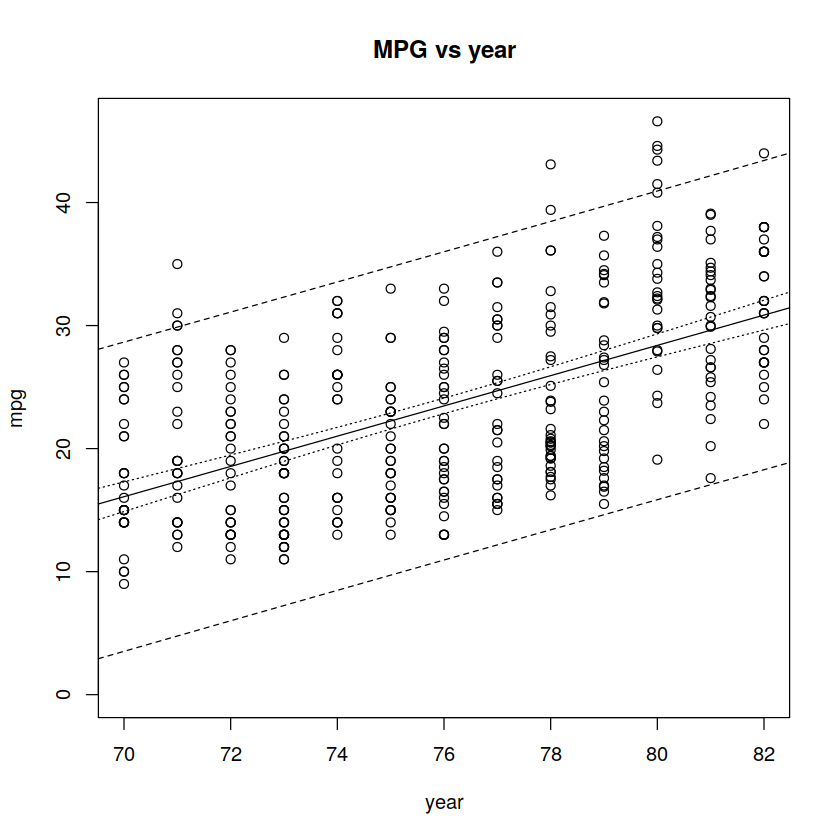

In [43]:
m <- lm(mpg ~ year, Auto);
summary(m);
plot(mpg ~ year, Auto, main = "MPG vs year", ylim=c(0,max(Auto$mpg)));

xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(year=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(year=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");